In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

# fix tik mpl
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "times",
    'font.size': 20,
})

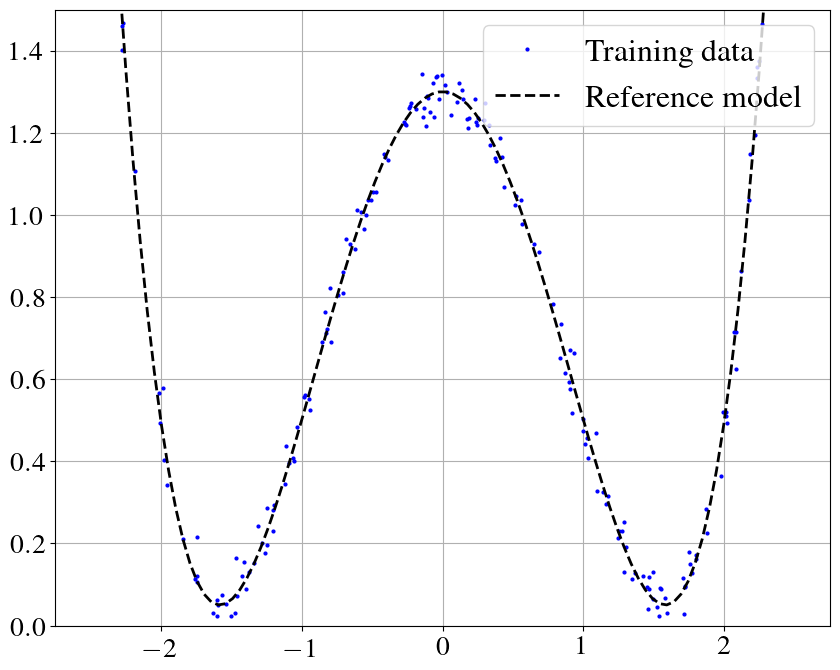

In [2]:
S = dataset.PolyDataset() #TrigonDataset() #MagmanDatasetScaled() #TrigonDataset()
S.sample(size=300, noise=0.05)
#S.load('data/magman.csv')
S.split()
S.plot()

#plt.savefig("magman-compr-base.png", format="png", bbox_inches='tight')

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

In [4]:
from matplotlib import pyplot as plt

tspline_conn = taylor_spline.TaylorSplineConnector()

def evaluate(data:list):
    y_mean = 0.
    y_mean_ref = 0.
    for dp in data:
        y_mean += dp.y
        y_mean_ref += S.func(dp.x)
    y_mean /= len(data)
    y_mean_ref /= len(data)

    TR_SSR = 0.
    TR_SST = 0.
    REF_SSR = 0.
    REF_SST = 0.
    for dp in data:
        tsplines = tspline_conn.fit(S, 4, silent=True, x0_in=dp.x)
        y_pred = tsplines[0].y(dp.x)
        TR_SSR += (y_pred - dp.y) ** 2
        TR_SST += (y_pred - y_mean) ** 2
        REF_SSR += (y_pred - S.func(dp.x)) ** 2
        REF_SST += (y_pred - y_mean_ref) ** 2

    TR_MSE = TR_SSR / len(data)
    print("TR_MSE " + str(TR_MSE))

    TR_R2 = TR_SSR / TR_SST
    print("TR_R2 " + str(TR_R2))

    REF_MSE = REF_SSR / len(data)
    print("REF_MSE " + str(REF_MSE))

    REF_R2 = REF_SSR / REF_SST
    print("REF_R2 " + str(REF_R2))


print("===== TRAINING EVALUATION =====")
evaluate(S.data)

print()

print("===== TEST EVALUATION =====")
evaluate(S.test)

===== TRAINING EVALUATION =====
TR_MSE 0.0013983317771128288
TR_R2 0.003485781318986369
REF_MSE 0.0001262595014712628
REF_R2 0.0003147371091644461

===== TEST EVALUATION =====
TR_MSE 0.0015804518835081769
TR_R2 0.004702071940745024
REF_MSE 0.00011183054737862976
REF_R2 0.00033272324998100876


NameError: name 'X' is not defined

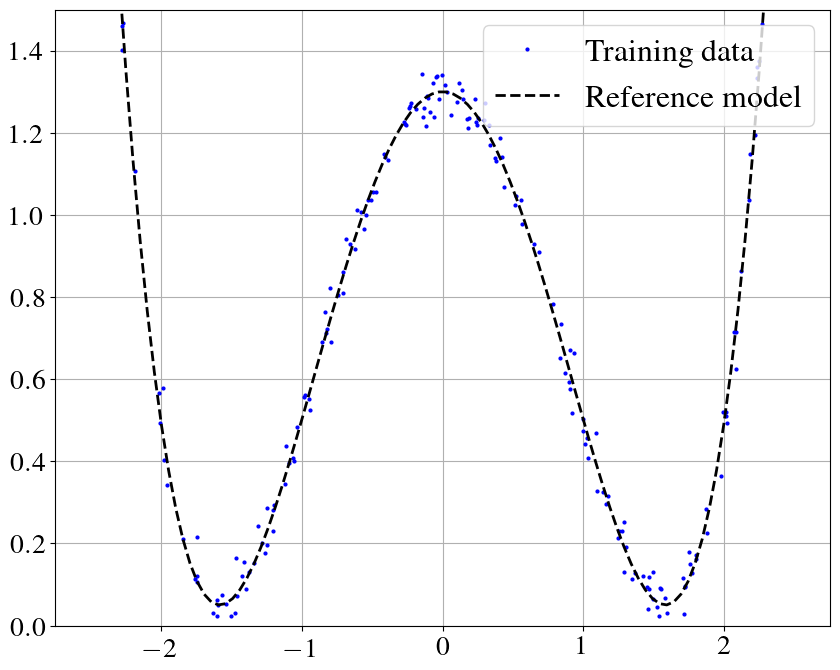

In [5]:
S.plot()
#for ts in tsplines:
#    print(f"Fitness: {ts.fitness(S)}")
#    ts.plot(show=False)
plt.plot(X, Y, color='red', linewidth=3)
plt.show()

plt.savefig("magman-semod-nopk.png", format="png", bbox_inches='tight')